In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
PT_TO_IN = 72
TEXTWIDTH = 508 / PT_TO_IN
COLUMNWIDTH = 244 / PT_TO_IN
colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#198038']

plt.rc('axes', fc='w', prop_cycle = mpl.cycler(color=colors))
plt.rc('font', size = 8, family='serif', serif='Nimbus Roman')
plt.rc('text', usetex=False)
plt.rc('mathtext', rm = 'serif', it = 'serif:italic', bf = 'serif:bold', fontset = 'custom')
plt.rc('figure', figsize = [0.8 * COLUMNWIDTH, 0.8 * COLUMNWIDTH], dpi = 500)
plt.rc('lines', lw = 2, markersize = 2)
plt.rc('legend', frameon=False)

In [3]:
import src.observation as obs
from src.analysis import SatGenData as Sats
from src.analysis import Weights

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...


# Overview

The key idea of the inference is that `SatGen` provides a joint distribution $f_\mathrm{pred}(\boldsymbol{x},\,\boldsymbol{\theta})$ describing how observed parameters $\boldsymbol{\theta}$ correlate with other parameters $\boldsymbol{x}$. Given an observed distribution of $\boldsymbol{\theta}$ for MW dwarf $i$, we can then infer  
$$f_i(\boldsymbol{x}) = \int\! f_\mathrm{pred}(\boldsymbol{x},\,\boldsymbol{\theta}) \frac{f_i(\boldsymbol{\theta})}{f_\mathrm{pred}(\boldsymbol{\theta})}\,\mathrm{d}\boldsymbol{\theta}.$$
This inferred distribution is therefore the sampled distribution of $\boldsymbol{x}$ values for `SatGen` satellites where each satellite picks up a weight $\frac{f_i(\boldsymbol{\theta})}{f_\mathrm{pred}(\boldsymbol{\theta})}$. (See Section 2.2 of the paper for more detail.)

To compute these weights, the `analysis.Weights` class combines the predicted distribution from `SatGen` (`analysis.SatGenData`) with observational values for a MW dwarf (`observation.Dwarf`). For each of these modules, classes, and methods, you may consult the docstring for more information.

# SatGenData class

load in the `SatGen` data using the `analysis.SatGenData` class:

In [4]:
%%time
nihao_rp17 = Sats('data/NIHAO_RP17.npz')
print('NIHAO, RP17 loaded')

NIHAO, RP17 loaded
CPU times: user 3min 42s, sys: 7.46 s, total: 3min 49s
Wall time: 3min 50s


The `SatGen` data can be accessed with the `get()` method:

In [5]:
logMstar = nihao_rp17.get('stellar_mass', log = True)
logVmax = nihao_rp17.get('v_max', log = True)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


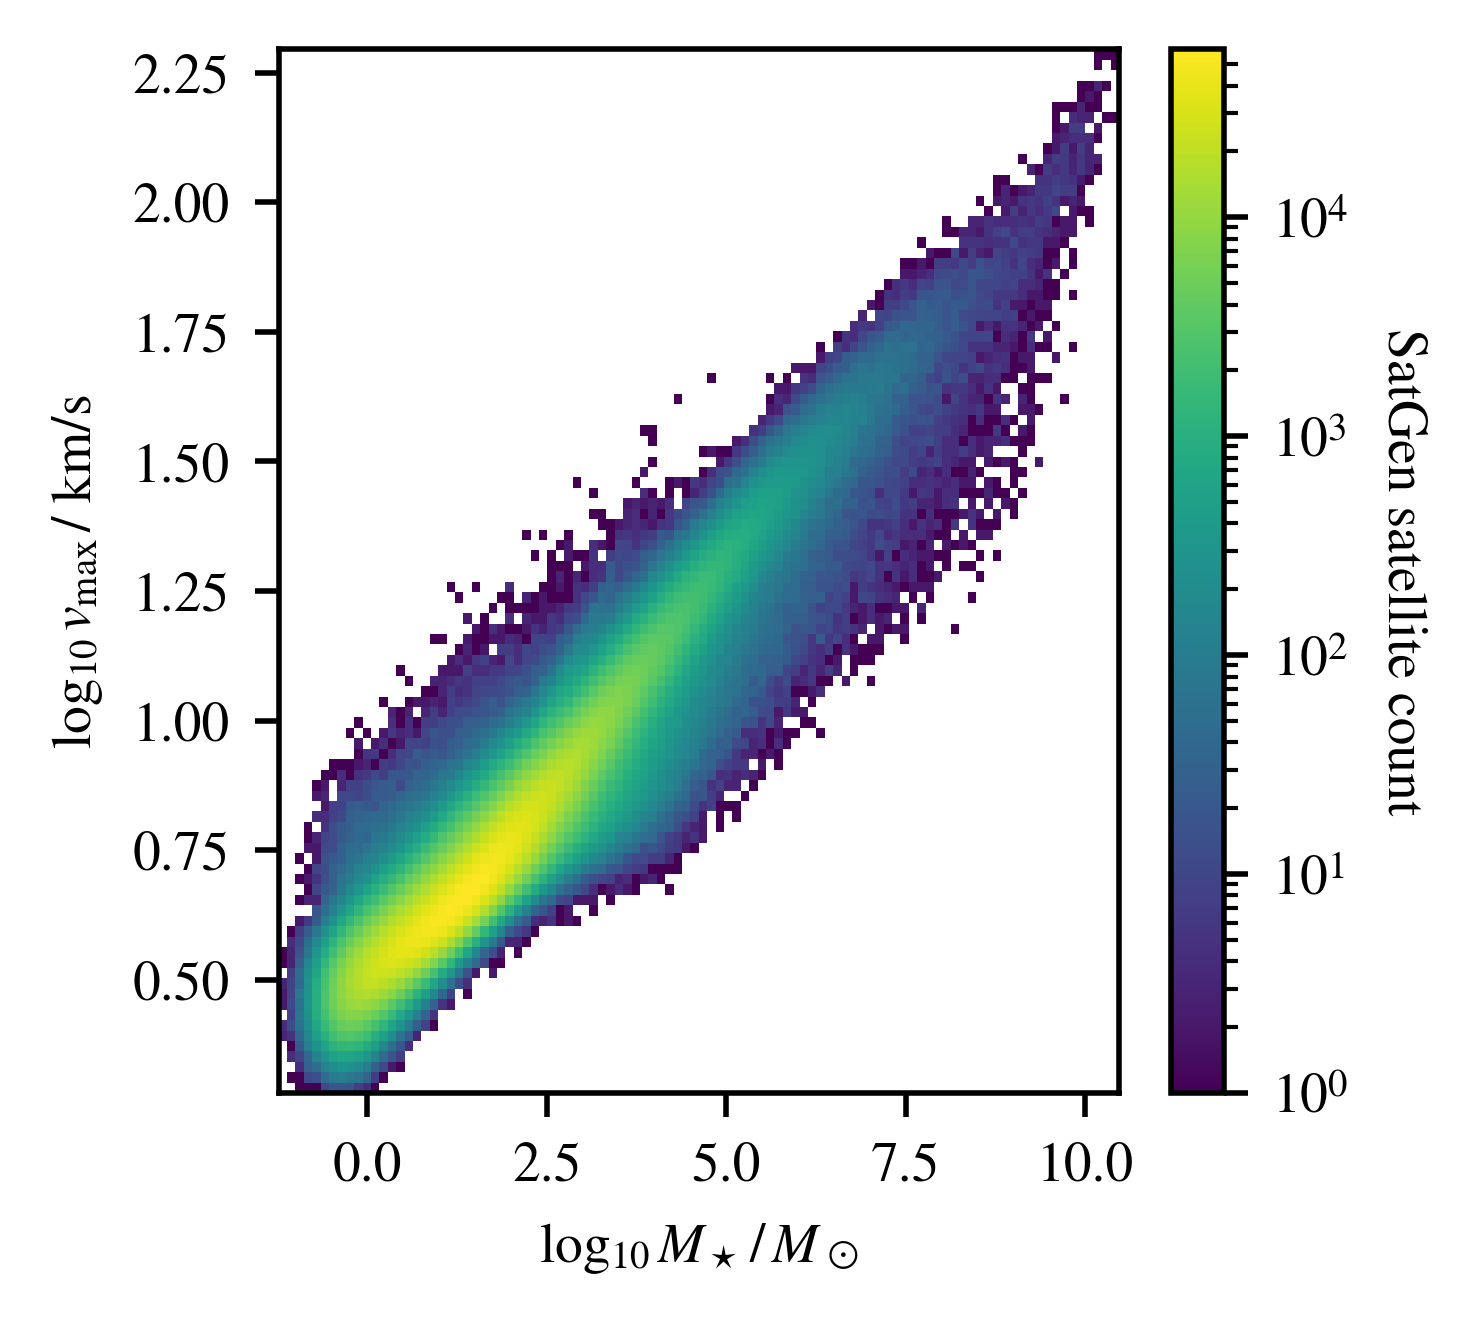

In [6]:
# create 2D histogram showing the correlation between Mstar and Vmax
plt.figure()
plt.hist2d(logMstar, logVmax, bins = 100, norm = mpl.colors.LogNorm())
plt.colorbar().set_label('SatGen satellite count', va = 'bottom', rotation = -90)
plt.xlabel('$\log_{10}M_\star\,/\,M_\odot$')
plt.ylabel('$\log_{10}v_\mathrm{max}\,/$ km/s')
plt.show()

The data provided includes: 
 - `hostID`: the ID of the MW realization to which the satellite belongs
 - `virial_mass`: the virial mass (in $M_\odot$), 
 - `virial_radius`: virial radius (in kpc), 
 - `stellar_mass`: the stellar mass (in $M_\odot$),
 - `concentration`: the concentration $c_{-2} = r_\mathrm{vir}/r_{-2}$, 
 - `v_max`: $v_\mathrm{max}$ (in km/s), 
 - `r_max`: $r_\mathrm{max}$ (in kpc), 
 - `mass_loss`: the halo mass loss $M_\mathrm{vir}/M_\mathrm{peak}$, 
 - `stellar_mass_loss`: stellar mass loss (defined similarly), 
 - `position`, `velocity`: position and velocity in galactocentric cartesian coordinates (kpc and km/s, respectively), 
 - `half_light_radius`: half-light radius (in kpc), 
 - `half_mass_radius`: half-mass radius (in kpc), 
 - `rho150`: instantaneous density at 150 pc (in $M_\odot/\mathrm{kpc}^3$), 
 - `peak_virial_mass`: peak virial mass (in $M_\odot$), 
 - `peak_stellar_mass`: peak stellar mass (in $M_\odot$), 
 - `peak_v_max`: peak $v_\mathrm{max}$ (in km/s), 
 - `infall_time`: infall time (in Gyr lookback), 
 - `pericenter`, `apocenter`: pericenter and apocenter (in kpc), 
 - `eccentricity`: eccentricity, 
 - `pericentric_passages`: number of pericentric passages, 
 - `DekelCAD`: $z = 0$ Dekel profile parameters (concentration $c$, innermost slope $\alpha$, and virial overdensity $\Delta$), used in `SatGen.profiles.Dekel`, 
 - `MCADz_infall`: Dekel profile parameters at the time of infall into the MW (virial mass, $c$, $\alpha$, $\Delta$, and redshift of infall), 
 - `MCADz_first_infall`: Dekel profiles at the time of first infall (upon leaving the field), 
 - `parentID`: the index of the order-one parent satellite within the MW satellite system (i.e., the index into the subset of satellites with matching `hostID`. This is -1 in the case of direct accretion or a destroyed parent), 
 - `infall_order`: the order of the satellite at the time of accretion onto the MW, 
 - `parent_mass`: the mass (in $M_\odot$) of the original group host evaluated at $z = 0$ (equal to the MW mass in the case of direct accretion), 
 - `infall_parent_mass`: the mass (in $M_\odot$) of the original group host evaluated at the time of accretion onto the MW, 
 - `parent_alive`: whether or not the original group host survives to $z = 0$, and 
 - `time_pre_infall`: the time spent evolving in a group system before MW accretion (in Gyr). 

More information is in principle able to be extracted from the SatGen data (see `satgen_preprocessing.read_file`), but this is beyond sufficient for the study here.

# Dwarf class

the `Dwarf` class holds various observational data. In particular, `logMhalf`, `rhalf`, `logMstar`, `rperi`, and `tinfall` are provided as attributes, along with associated error bars `*_err`, structured as `[lower_error, upper_error]`.

In [7]:
fnx = obs.Dwarf('Fornax')
print(fnx)
print('log10(Mstar/Msun):', fnx.logMstar, fnx.logMstar_err)

Fornax: logMstar = 7.40 ± 0.22 dex, logMhalf = 7.88 ± 0.03 dex @ r1/2 = 836 pc
log10(Mstar/Msun): 7.399181246047625 [0.22 0.22]


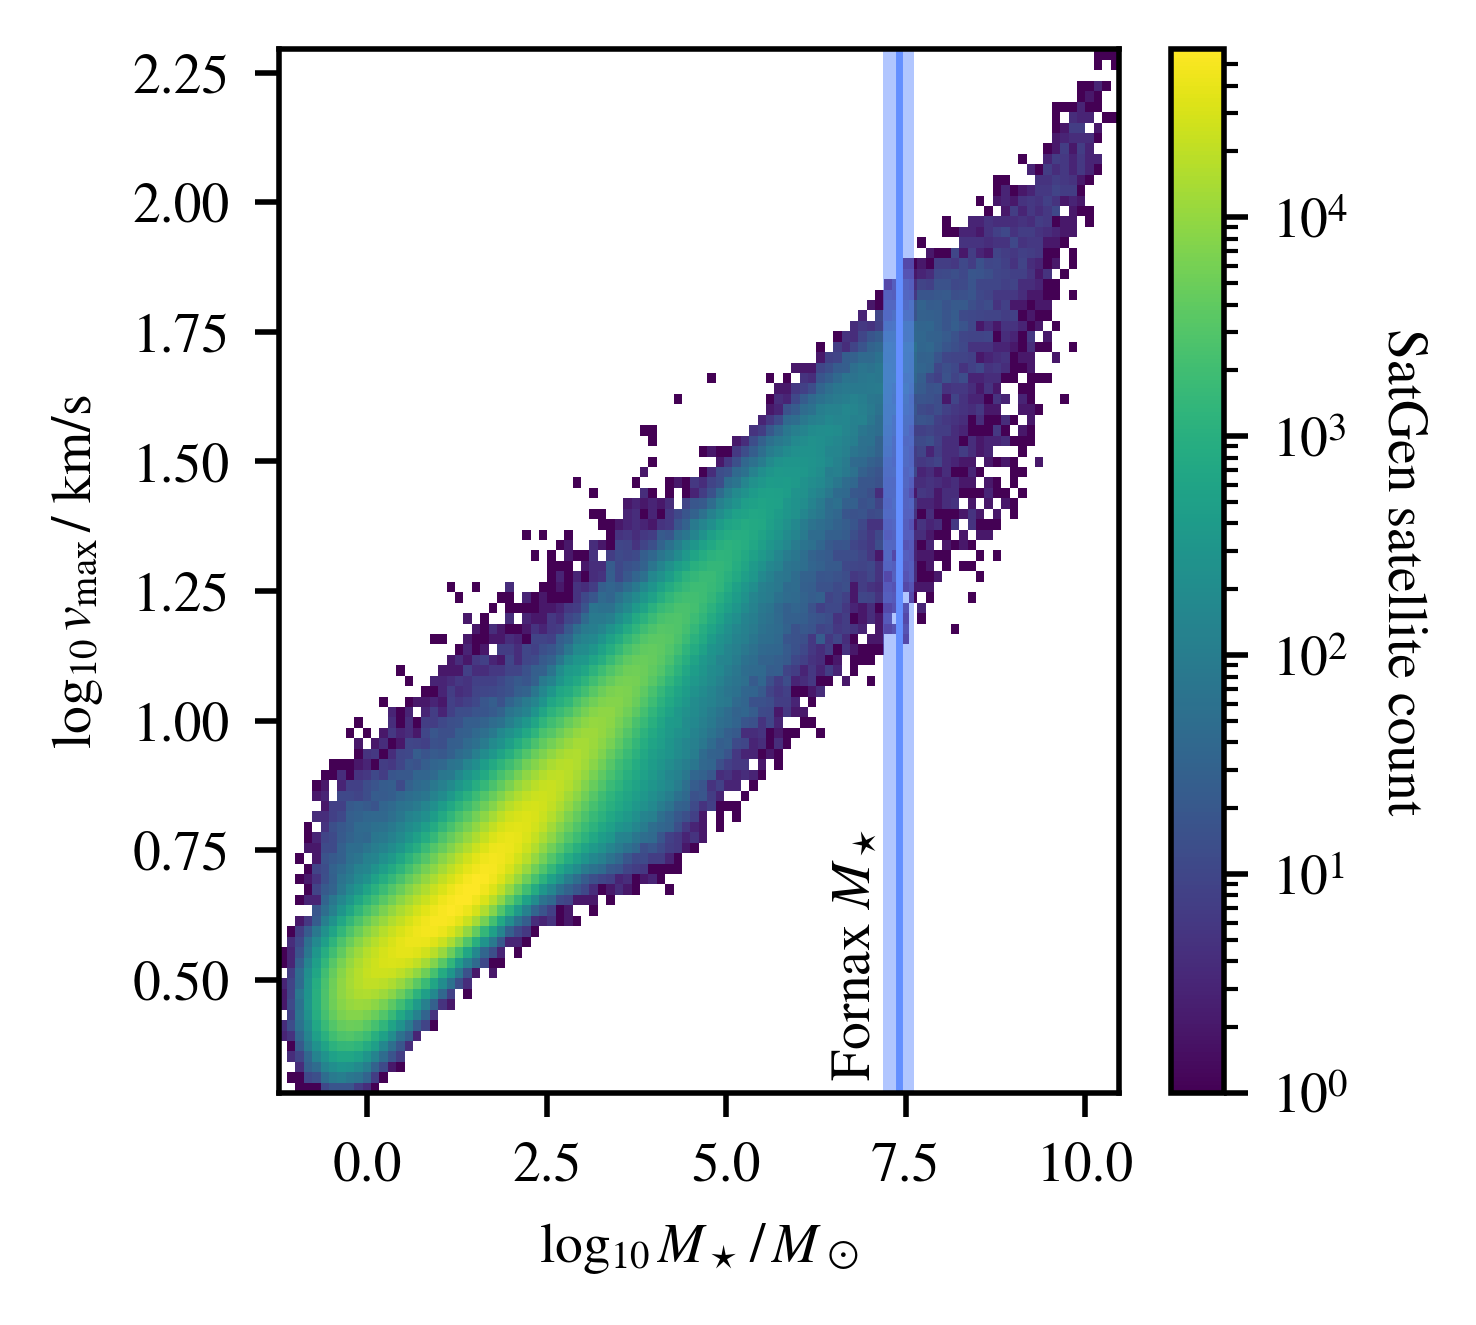

In [8]:
plt.figure()
plt.hist2d(logMstar, logVmax, bins = 100, norm = mpl.colors.LogNorm())
plt.colorbar().set_label('SatGen satellite count', va = 'bottom', rotation = -90)

# add observed Fnx values to the plot from above
plt.text(fnx.logMstar - fnx.logMstar_err[0], plt.ylim()[0], ' Fornax $M_\star$', rotation = 90, ha = 'right', va = 'bottom')
plt.vlines(fnx.logMstar, *plt.ylim(), lw = 1)
plt.fill_between(fnx.logMstar + [-1, 1] * fnx.logMstar_err, *plt.ylim(), alpha = 0.5, ec = None)

plt.xlabel('$\log_{10}M_\star\,/\,M_\odot$')
plt.ylabel('$\log_{10}v_\mathrm{max}\,/$ km/s')
plt.show()

The list of dwarfs for which data is provided is the following:

In [9]:
print(obs.dwarf_names)

['Canes Venatici I' 'Carina' 'Draco' 'Fornax' 'Leo I' 'Leo II' 'Sextans'
 'Sculptor' 'Ursa Minor']


One can also access the `SatGen` data directly using the `data` attribute, and a number of masks are provided to cut on this dataset:
 - `surviving` is True when the satellite is above the mass resolution threshold
 - `calibrated` is True when the satellite is within the calibrated regime of `SatGen` tidal track
 - `splashback` is True when the satellite is outside the MW's virial radius
 
The satellites which are considered in the study are those for which `mask = surviving & calibrated & ~splashback` is True.

# Weights class

The `analysis.Weights` class constructs the weight $$w_j = \frac{f_i(\boldsymbol{\theta}_j)}{f_\mathrm{pred}(\boldsymbol{\theta}_j)}$$ which is applied to `SatGen` satellite $j$ to reproduce an inferred distribution $f_i(\boldsymbol{x})$.

In [10]:
nihao_weight = Weights(nihao_rp17, 'Fornax')

there are three pre-computed weights: 
 - `Mstar`, which uses $\boldsymbol{\theta} = \log_{10}M_\star$,
 - `Mhalf`, which uses $\boldsymbol{\theta} = \log_{10}M_{1/2}$,
 - `joint_mass`, which uses the joint distribution of $\boldsymbol{\theta} = (\log_{10}M_\star,\, \log_{10}M_{1/2})$,
 

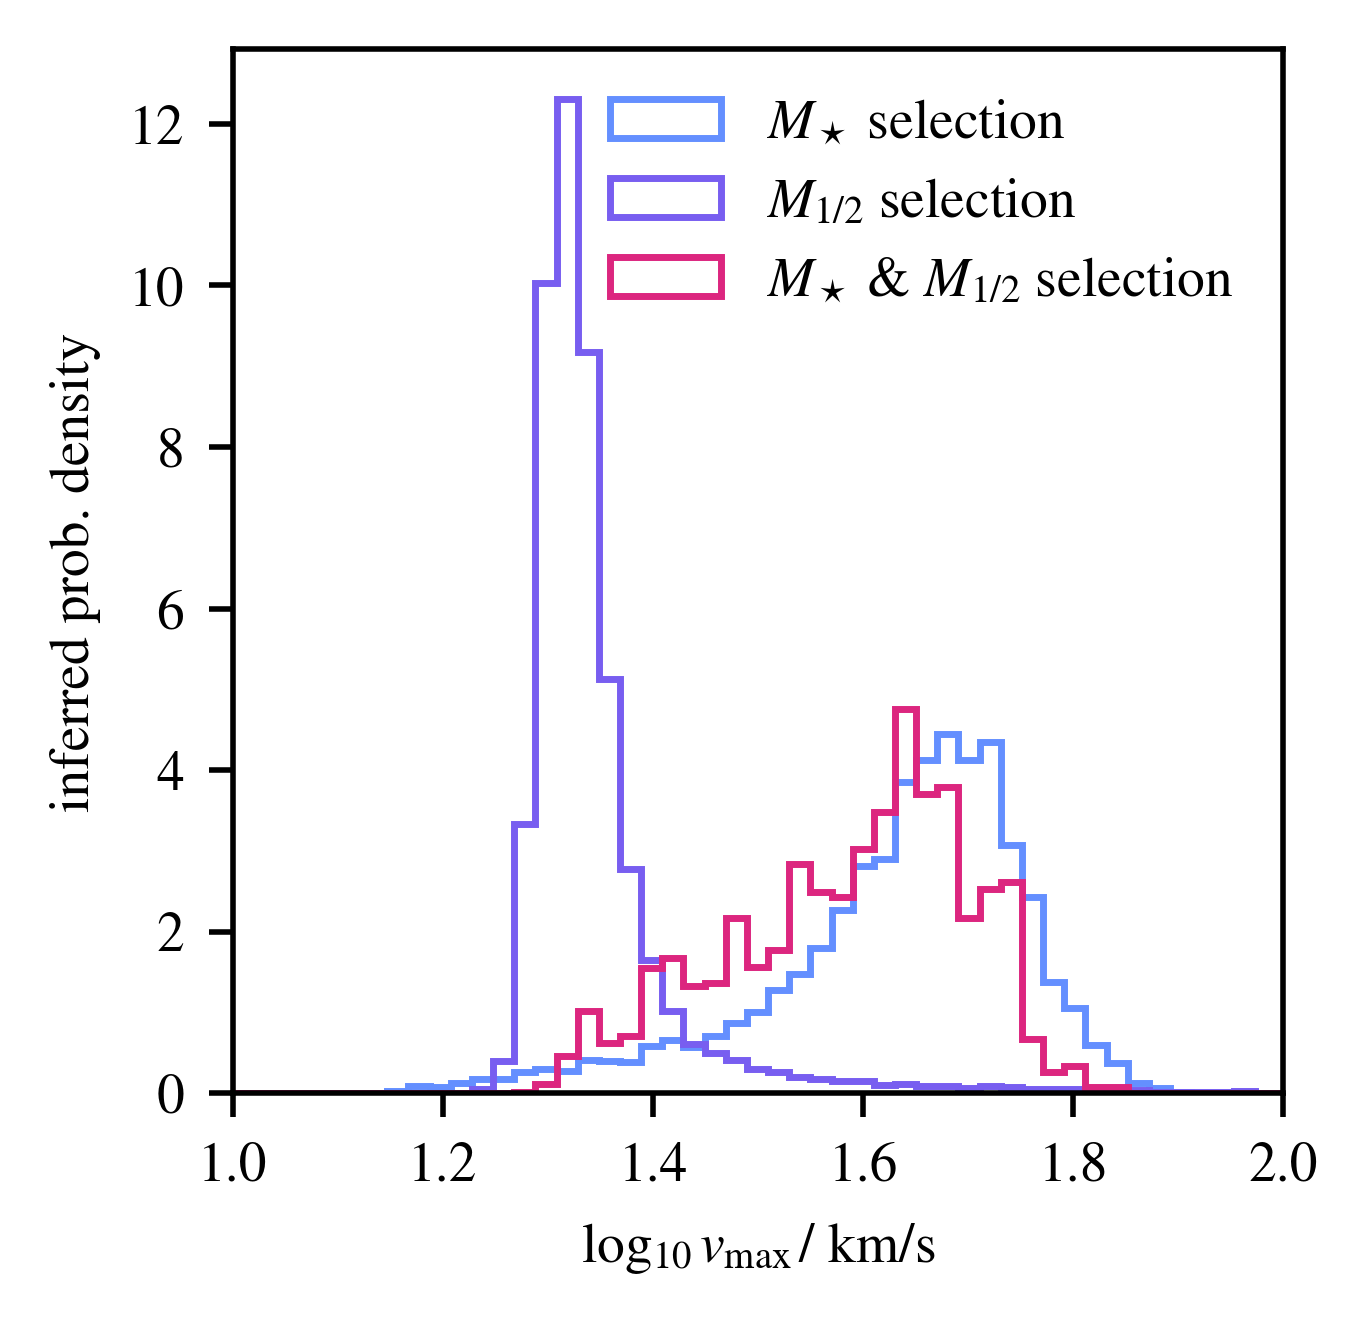

In [11]:
plt.figure()
params = dict(density = True, bins = 100, histtype = 'step')
plt.hist(logVmax, weights = nihao_weight.Mstar, label = '$M_\star$ selection', **params)
plt.hist(logVmax, weights = nihao_weight.Mhalf, label = '$M_{1/2}$ selection', **params)
plt.hist(logVmax, weights = nihao_weight.joint_mass, label = '$M_\star$ & $M_{1/2}$ selection', **params)
plt.legend(loc = 'upper right')
plt.xlim(1, 2)
plt.xlabel('$\log_{10}v_\mathrm{max}\,/$ km/s')
plt.ylabel('inferred prob. density')
plt.show()

The `Weights` class also provides functions which provide interpolations of these PDFs, interpolated CDFs, or interpolated quantile functions (inverse CDFs). These can be used to quickly get 16-50-85th percentiles for inferred quantities:

In [12]:
from scipy import stats

In [13]:
vmax_quantile = nihao_weight.quantile(logVmax)
median, error = vmax_quantile(0.5), np.diff(vmax_quantile(stats.norm.cdf([-1, 0, 1])))
print(f'log(Vmax / km/s) = {median:0.2f} - {error[0]:0.2f} + {error[1]:0.2f}')

log(Vmax / km/s) = 1.61 - 0.15 + 0.09


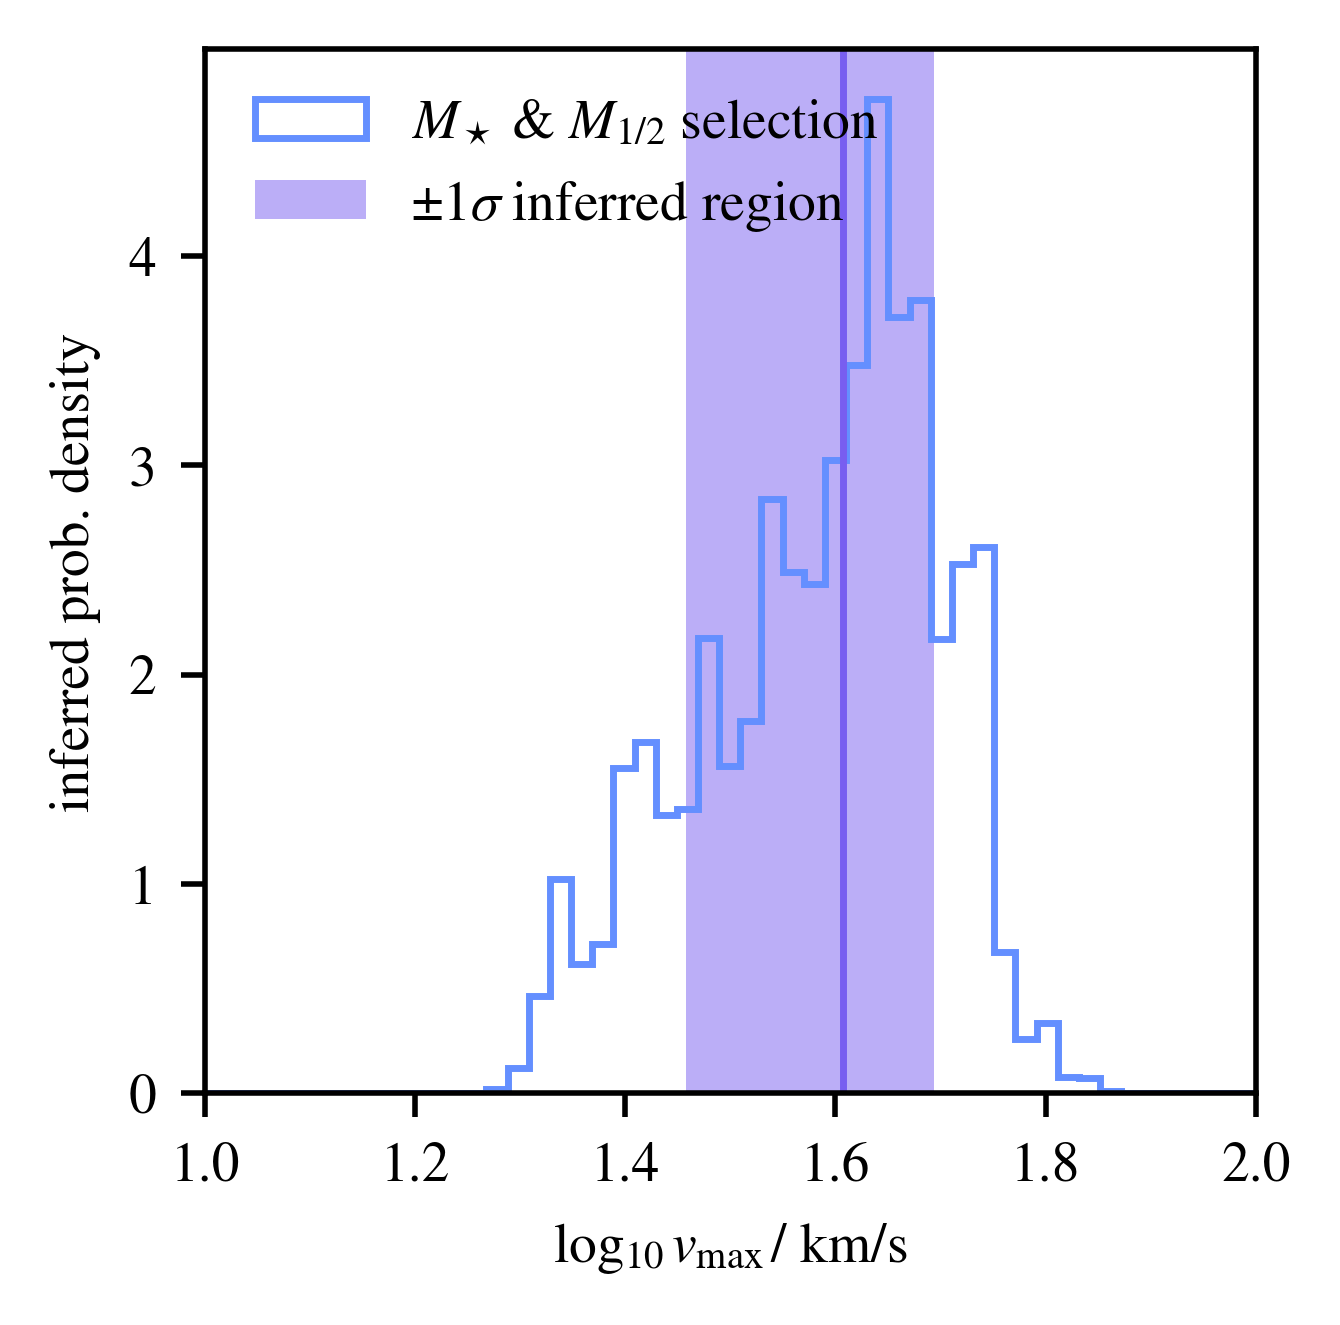

In [14]:
plt.figure()
plt.hist(logVmax, weights = nihao_weight.joint_mass, label = '$M_\star$ & $M_{1/2}$ selection', **params)
ylim = plt.ylim()
plt.vlines(median, *ylim, color = colors[1], lw = 1)
plt.fill_between(median + [-1, 1] * error, *ylim, color = colors[1], alpha = 0.5, ec = None, label = '$\pm 1\sigma$ inferred region')
plt.legend(loc = 'upper left')
plt.ylim(ylim)
plt.xlim(1, 2)
plt.xlabel('$\log_{10}v_\mathrm{max}\,/$ km/s')
plt.ylabel('inferred prob. density')
plt.show()

## Comparing feedback models

By loading in a different set of `SatGen` data, one can compare the inferred probability distributions. The following, for example, computes the projection of Figure 3 of the paper onto the vertical axis.

In [15]:
%%time
apostle_rp17 = Sats('data/APOSTLE_RP17.npz')
apostle_weight = Weights(apostle_rp17, 'Fornax')
print('APOSTLE, RP17 loaded')

APOSTLE, RP17 loaded
CPU times: user 2min 7s, sys: 5.18 s, total: 2min 13s
Wall time: 2min 13s


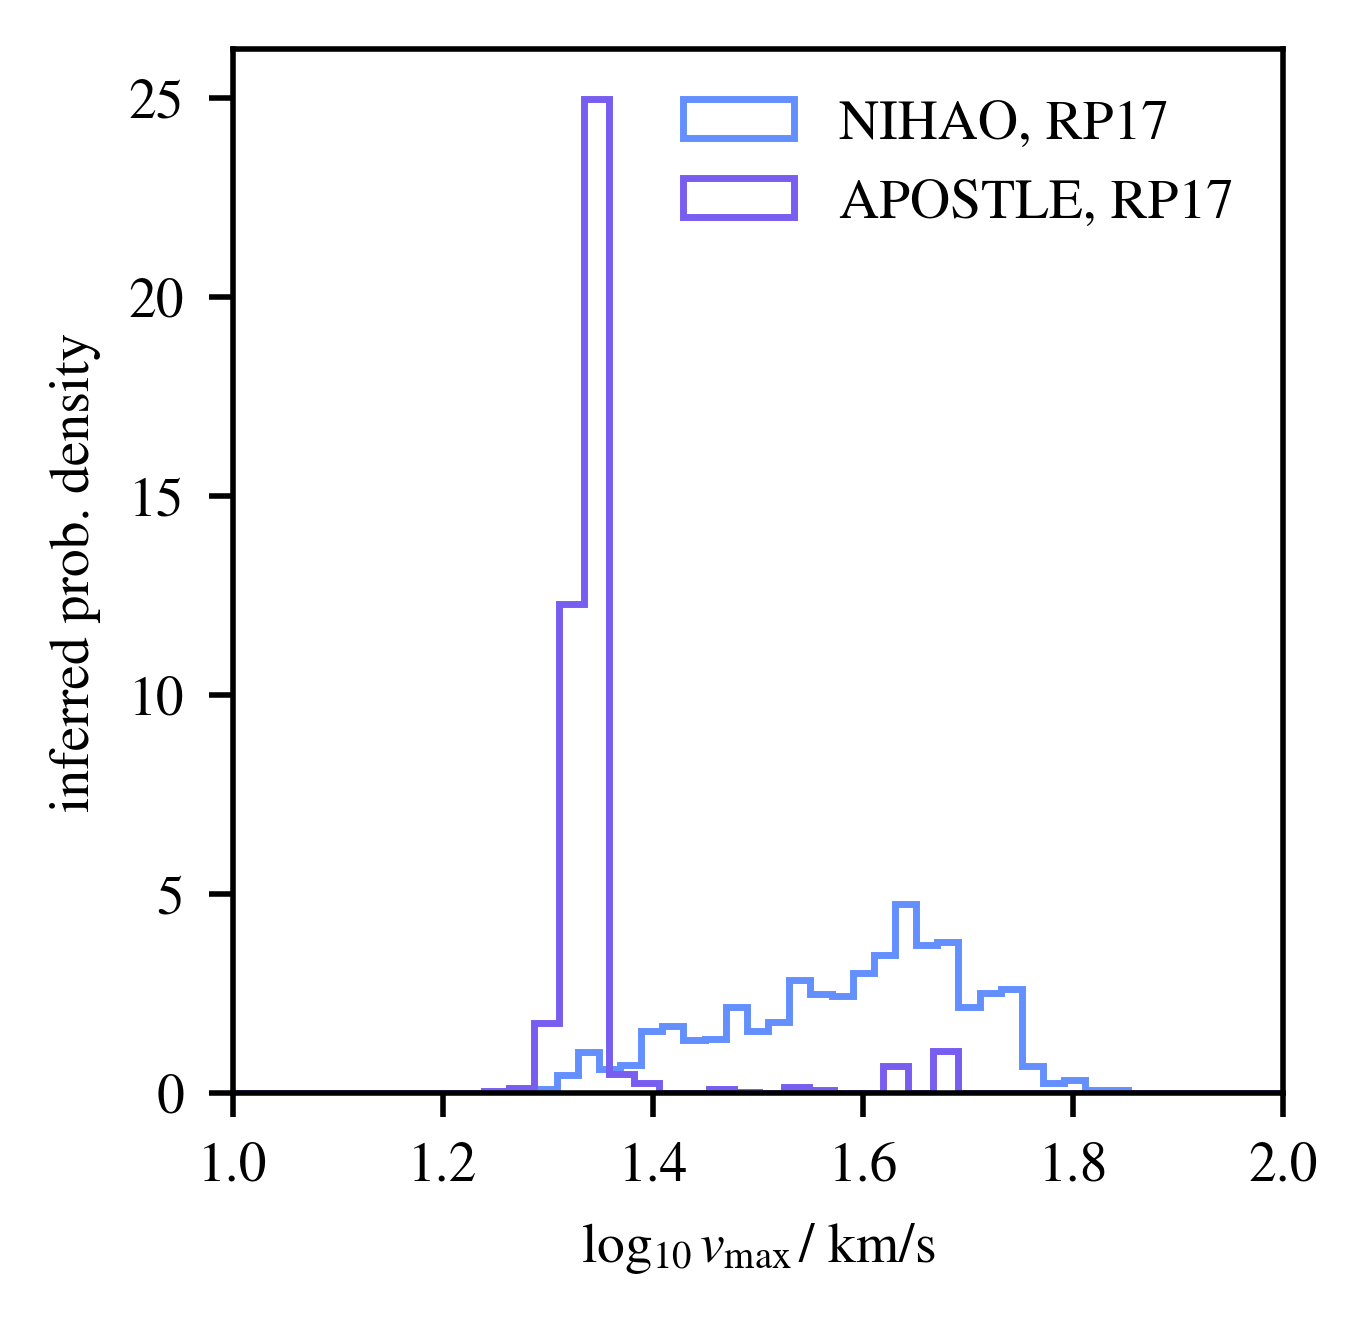

In [16]:
plt.figure()
plt.hist(logVmax, weights = nihao_weight.joint_mass, label = 'NIHAO, RP17', **params)
plt.hist(apostle_rp17.get('v_max', log = True), weights = apostle_weight.joint_mass, label = 'APOSTLE, RP17', **params)
plt.legend(loc = 'upper right')
plt.xlim(1, 2)
plt.xlabel('$\log_{10}v_\mathrm{max}\,/$ km/s')
plt.ylabel('inferred prob. density')
plt.show()

## Caveats

This method effectively constructs an estimator 
$$ \hat{f}_i(\boldsymbol{x},\,\boldsymbol{\theta}) = f_\mathrm{pred}(\boldsymbol{x},\,\boldsymbol{\theta})\cdot\frac{f_i(\boldsymbol{\theta})}{f_\mathrm{pred}(\boldsymbol{\theta})}$$
for the true joint distribution $f_i(\boldsymbol{x},\,\boldsymbol{\theta})$. This allows us to infer $f_i(\boldsymbol{x})$ by marginalizing $\hat{f}_i$ over the $\boldsymbol{\theta}$ parameters. $\hat{f}_i$ is constructed such that the $\hat{f}_i(\boldsymbol{\theta})$ marginal is exactly the observed distribution $f_i(\boldsymbol{\theta})$ through reweighing the $f_\mathrm{pred}$ distribution from `SatGen`.

The most critical caveat to this method is that some regions of $\boldsymbol{\theta}$-space may not particularly populated in the sample of $f_\mathrm{pred}$, and so to reconstruct the marginal appropriately, a small number of `SatGen` satellites carry a large fraction of the total weight. This means that inferred $\boldsymbol{x}$ distributions are set by a small population instead of a statistically significant sample. The cutoff for "small population" is arbitrary, but one possible definition is when fewer than $n$ satellites contribute 68% of the weight.

In [17]:
def is_low_statistics(weights, n_sats = 25, 
                      weight_fraction = np.diff(stats.norm.cdf([-1, 1]))[0]):
    # sort from high weight -> low weight
    srt = weights.argsort()
    sorted_weights = weights[srt][::-1]
    # find the fraction of total weight within the first n_sats
    prob_in_nsats = sorted_weights[:n_sats].sum()/weights.sum()
    # is this above the threshold probability?
    return prob_in_nsats > weight_fraction

In [18]:
is_low_statistics(nihao_weight.joint_mass), is_low_statistics(apostle_weight.joint_mass)

(False, True)

As discussed in the paper, the APOSTLE RP17 model struggles to produce large-$M_\star$, low-$M_{1/2}$ satellites, and as such the region of $\boldsymbol{\theta} = (M_\star,\,M_{1/2})$ near the observed values for Fornax is not very populated. As such, Fornax analogues in APOSTLE RP17 are determined by a small number of high-weighted `SatGen` satellites. This is a necessary byproduct of the weighting procedure, as the weights produced are those required to recover the marginal distribution of $\boldsymbol{\theta}$ (as best as is possible given the sampling of $f_\mathrm{pred}$). 

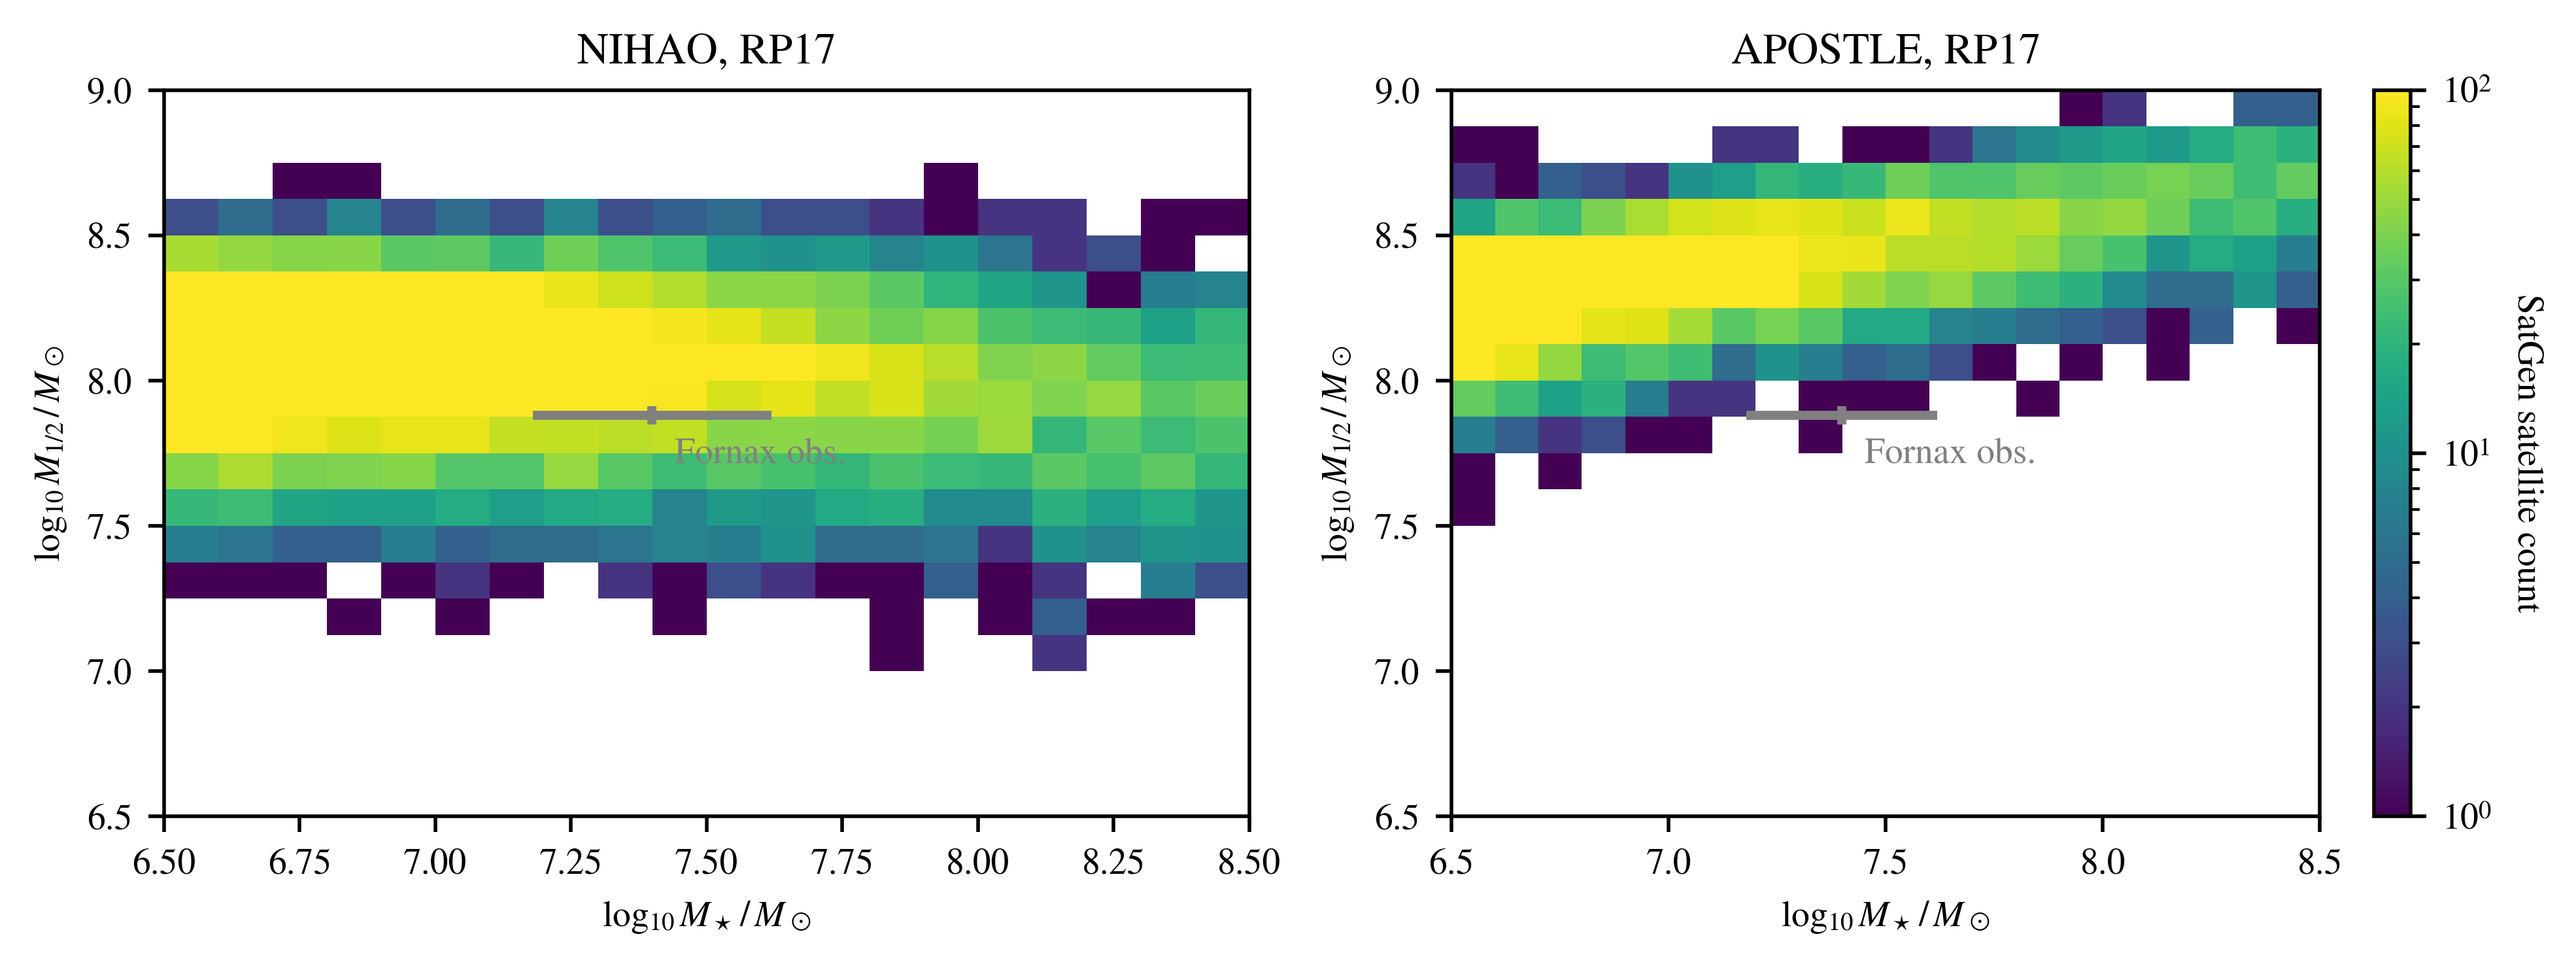

In [19]:
# plot_range = ((6.5, 8.5), (7.75, 8))
plot_range = ((6.5, 8.5), (6.5, 9))

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for ax, label, weight in [(axes[0], 'NIHAO', nihao_weight), (axes[1], 'APOSTLE', apostle_weight)]:
    this_logMstar = weight.sats.logMstar
    this_logMhalf = weight.sats.logMhalf['Fornax']
    plt.sca(ax)
    plt.hist2d(this_logMstar, this_logMhalf, range = plot_range, bins = 20, norm = mpl.colors.LogNorm(vmin = 1, vmax = 100))
    plt.errorbar(weight.dwarf.logMstar, weight.dwarf.logMhalf, xerr = weight.dwarf.logMstar_err.reshape((2,1)), yerr = weight.dwarf.logMhalf_err.reshape((2,1)), color = 'gray')
    plt.annotate(weight.dwarf.name + ' obs.', [weight.dwarf.logMstar, weight.dwarf.logMhalf], color = 'gray', xytext = (5, -5), va='top', ha = 'left', textcoords = 'offset points')
    plt.xlabel('$\log_{10}M_\star\,/\,M_\odot$')
    plt.ylabel('$\log_{10}M_{1/2}\,/\,M_\odot$')
    plt.xlim(min(plot_range[0]), max(plot_range[0]))
    plt.ylim(min(plot_range[1]), max(plot_range[1]))
    plt.title(label + ', RP17')
plt.colorbar().set_label('SatGen satellite count', rotation = -90, va='bottom')
plt.tight_layout()
plt.show()

This can be somewhat mitigated by the details of the $f_\mathrm{pred}(\boldsymbol{\theta})$ used to compute the weights -- in the current implementation, this distribution is estimtated with a histogram of $\boldsymbol{\theta}$. Adjusting the bin size of this histogram can allow for greater support in less populated regions of $\boldsymbol{\theta}$ space at the cost of a less accurate inferred $\hat{f}_i$. Alternatively, one can estimate the PDF via a KDE rather than a histogram, which may provide some benefit.